In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Data Exploration

After a careful review of the raw training and test data I decided to use the partly transformed data provided in the data archive.

In [3]:
# Downloading the data and converting fullVisitorId to a string in case it starts with 0
data_train = pd.read_csv("./train_filtered.csv", converters={'fullVisitorId': str})
data_test = pd.read_csv("./test_filtered.csv", converters={'fullVisitorId': str})

In [4]:
data_train.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue,...,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20160902,1131660440785968503,1,1472830385,1.0,1,1.0,1.0,0.0,...,@,1,0.0,@,@,0,@,organic,@,google
1,Organic Search,20160902,377306020877927890,1,1472880147,1.0,1,1.0,1.0,0.0,...,@,1,0.0,@,@,0,@,organic,@,google
2,Organic Search,20160902,3895546263509774583,1,1472865386,1.0,1,1.0,1.0,0.0,...,@,1,0.0,@,@,0,@,organic,@,google
3,Organic Search,20160902,4763447161404445595,1,1472881213,1.0,1,1.0,1.0,0.0,...,@,1,0.0,@,@,0,google + online,organic,@,google
4,Organic Search,20160902,27294437909732085,2,1472822600,1.0,1,0.0,1.0,0.0,...,@,1,0.0,@,@,1,@,organic,@,google


## Preprocessing of the data

In [5]:
# Create an empty dictionary to find nan values defined as @ in this dataset
how_many_ats = {}
for col in data_train.columns:
    if "@" in data_train[col].value_counts().index:
        how_many_ats[col] = data_train[col].value_counts()["@"] # count the number of @ in each column
    else:
        how_many_ats[col] = 0

pd.DataFrame(how_many_ats.items()).sort_values(1, ascending=False)

,0,1
21,trafficSource_adContent,891824
25,trafficSource_adwordsClickInfo.slot,881328
22,trafficSource_adwordsClickInfo.adNetworkType,881328
28,trafficSource_keyword,868435
26,trafficSource_campaign,864514
17,geoNetwork_metro,709283
30,trafficSource_referralPath,647483
14,geoNetwork_city,541968
19,geoNetwork_region,535552
18,geoNetwork_networkDomain,390535


In [6]:
# Drop variables that contain more than 5000 @ or nan values
to_be_dropped = [key for key in how_many_ats if how_many_ats[key] > 5000]
data_train = data_train.drop(columns=to_be_dropped) # drop for the train dataset
data_test = data_test.drop(columns=to_be_dropped) # drop for the test dataset
to_be_dropped # print columns that are dropped

['geoNetwork_city',
 'geoNetwork_metro',
 'geoNetwork_networkDomain',
 'geoNetwork_region',
 'trafficSource_adContent',
 'trafficSource_adwordsClickInfo.adNetworkType',
 'trafficSource_adwordsClickInfo.slot',
 'trafficSource_campaign',
 'trafficSource_keyword',
 'trafficSource_medium',
 'trafficSource_referralPath']

In [7]:
data_train = data_train.replace('@', np.nan) # replace remaining 

In [8]:
#remove na rows
data_train = data_train[data_train['device_browser'].notna()]
data_train = data_train[data_train['trafficSource_source'].notna()]
data_train = data_train[data_train['device_operatingSystem'].notna()]
data_train = data_train[data_train['geoNetwork_country'].notna()]
data_train = data_train[data_train['geoNetwork_continent'].notna()]
data_train = data_train[data_train['geoNetwork_subContinent'].notna()]

data_train

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue,...,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_continent,geoNetwork_country,geoNetwork_subContinent,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_isTrueDirect,trafficSource_source
0,Organic Search,20160902,1131660440785968503,1,1472830385,1.0,1,1.0,1.0,0.0,...,desktop,0,Windows,Asia,Turkey,Western Asia,1,0.0,0,google
1,Organic Search,20160902,377306020877927890,1,1472880147,1.0,1,1.0,1.0,0.0,...,desktop,0,Macintosh,Oceania,Australia,Australasia,1,0.0,0,google
2,Organic Search,20160902,3895546263509774583,1,1472865386,1.0,1,1.0,1.0,0.0,...,desktop,0,Windows,Europe,Spain,Southern Europe,1,0.0,0,google
3,Organic Search,20160902,4763447161404445595,1,1472881213,1.0,1,1.0,1.0,0.0,...,desktop,0,Linux,Asia,Indonesia,Southeast Asia,1,0.0,0,google
4,Organic Search,20160902,27294437909732085,2,1472822600,1.0,1,0.0,1.0,0.0,...,mobile,1,Android,Europe,United Kingdom,Northern Europe,1,0.0,1,google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902750,Social,20170104,5123779100307500332,1,1483554750,0.0,17,1.0,15.0,0.0,...,desktop,0,Windows,Americas,Puerto Rico,Caribbean,1,0.0,0,youtube.com
902751,Social,20170104,7231728964973959842,1,1483543798,0.0,18,1.0,13.0,0.0,...,mobile,1,Android,Asia,Sri Lanka,Southern Asia,1,0.0,0,youtube.com
902752,Social,20170104,5744576632396406899,1,1483526434,0.0,24,1.0,21.0,0.0,...,mobile,1,Android,Asia,South Korea,Eastern Asia,1,0.0,0,youtube.com
902753,Social,20170104,2709355455991750775,1,1483592864,0.0,24,1.0,22.0,0.0,...,desktop,0,Windows,Asia,Indonesia,Southeast Asia,1,0.0,0,facebook.com


In [9]:
# Merge full data for ordinal transformation
full_data = pd.concat([data_train, data_test], ignore_index=True, sort=False)

In [10]:
# Reviewing the sape of the data
print(data_train.shape)
print(data_test.shape)
print(full_data.shape)

(896705, 21)
(804684, 20)
(1701389, 21)


In [11]:
full_data = full_data.replace('@', np.nan) # just incase there are any other nan values

full_data = full_data[full_data['device_browser'].notna()]
full_data = full_data[full_data['trafficSource_source'].notna()]
full_data = full_data[full_data['device_operatingSystem'].notna()]
full_data = full_data[full_data['geoNetwork_country'].notna()]
full_data = full_data[full_data['geoNetwork_continent'].notna()]
full_data = full_data[full_data['geoNetwork_subContinent'].notna()]

In [12]:
print(full_data.isnull().sum())

channelGrouping                                  0
date                                             0
fullVisitorId                                    0
visitNumber                                      0
visitStartTime                                   0
totals_bounces                                   0
totals_hits                                      0
totals_newVisits                                 0
totals_pageviews                                 0
totals_transactionRevenue                   796585
device_browser                                   0
device_deviceCategory                            0
device_isMobile                                  0
device_operatingSystem                           0
geoNetwork_continent                             0
geoNetwork_country                               0
geoNetwork_subContinent                          0
trafficSource_adwordsClickInfo.isVideoAd         0
trafficSource_adwordsClickInfo.page              0
trafficSource_isTrueDirect     

In [13]:
#Checking the variable distributions
for col in list(full_data.columns):
    print('\x1b[1;31m' + col + '\x1b[0m' + '\n')
    print(full_data[col].value_counts())
    print('-' * 50 )

channelGrouping

Organic Search    736462
Social            348403
Direct            268115
Referral          210863
Display            51088
Paid Search        45525
Affiliates         32767
(Other)               67
Name: channelGrouping, dtype: int64
--------------------------------------------------
date

20171212    9196
20171213    9090
20171004    5099
20170920    4868
20161128    4785
            ... 
20170514    1287
20170513    1241
20161224    1219
20161230    1219
20161231    1197
Name: date, Length: 638, dtype: int64
--------------------------------------------------
fullVisitorId

1957458976293878100    400
7282998257608986241    315
3884810646891698298    268
0824839726118485274    258
7477638593794484792    218
                      ... 
7808970960721331212      1
1863012299086018357      1
3463026358294318133      1
5457946448495539397      1
5802305400313908380      1
Name: fullVisitorId, Length: 1310961, dtype: int64
--------------------------------------------------


In [14]:
#remove values that have too few observations
full_data = full_data[full_data.groupby('device_browser').device_browser.transform('count') > 10]
full_data = full_data[full_data.groupby('trafficSource_source').trafficSource_source.transform('count') > 10]
full_data = full_data[full_data.groupby('geoNetwork_country').geoNetwork_country.transform('count') > 10]

In [15]:
# values that should be converted to an ordinal scale
ordinal_values = ['channelGrouping', 'device_browser', 'device_deviceCategory', 'device_operatingSystem', 'geoNetwork_continent',
                  'trafficSource_source', 'geoNetwork_country', 'geoNetwork_subContinent',]

In [16]:
from sklearn.preprocessing import OrdinalEncoder

#Convert the data to ordinal scale
for col in ordinal_values:
    ord_enc = OrdinalEncoder()
    full_data.loc[full_data[col].notna(), [col]] = ord_enc.fit_transform(full_data[[col]].dropna().values.reshape(-1,1))
    #full_data[col] = full_data.col.fillna(-1)

In [17]:
# convert data back to train and test based on totals_transationRevenue variable presence
data_test = full_data[full_data['totals_transactionRevenue'].isna()].drop("totals_transactionRevenue",axis=1).reset_index(drop=True)
data_train = full_data[full_data['totals_transactionRevenue'].notna()]

In [18]:
print(data_train.shape)
print(data_test.shape)

(896069, 21)
(796122, 20)


# Task1: Can we identify customer generating revenue 

I identify them in the test dataset later

In [19]:
# Find customer generating revenue
revenue_generators = list(data_train.fullVisitorId[data_train.totals_transactionRevenue > 0])

# Create a new indicator column identifying customers who generated  revenue with 1 and thos who did not with 0
data_train['revenue_generator'] =  np.where(data_train['fullVisitorId'].isin(revenue_generators), 1 ,0)

<ipython-input-19-2babe5d62395>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['revenue_generator'] =  np.where(data_train['fullVisitorId'].isin(revenue_generators), 1 ,0)


In [ ]:
import csv

# open the file in the write mode
f = open('./revenue_generators.txt', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
for visitor in revenue_generators:
        writer.writerow([visitor])
# writer.writerows(revenue_generators)

# close the file
f.close()

Note that the fullVisitorId uniquely identifies the customer. The customer might have visited the store on multiple occasions yet generated revenue only in one of the visits. This explains why the revenue generators sometimes have 0 in totals_transactionRevenue.

# Task 2: What are the critical factors in predicting revenue generating customers

In [20]:
# split the data into dependent and independent variables
x_train = data_train.drop("revenue_generator",axis=1).reset_index(drop=True)
y_train = data_train.filter(regex="revenue_generato").reset_index(drop=True)

In [21]:
x_train = x_train.drop('trafficSource_adwordsClickInfo.isVideoAd',axis=1).reset_index(drop=True)

In [22]:
from sklearn.model_selection import train_test_split

# Split the training data into 20% validation and 80% training
X_train, X_validate, Y_train, Y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

# Check if all the values sets are correctly split
print(X_train.shape, X_validate.shape, Y_train.shape, Y_validate.shape)

(716855, 20) (179214, 20) (716855, 1) (179214, 1)


In [23]:
## Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif #use this in case the problem would be a classification problem

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all') #Change the score_func parameter depending on your problem
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

C:\Users\Rok\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Feature 0: 0.064616
Feature 1: 0.003805
Feature 2: 0.091637
Feature 3: 0.078966
Feature 4: 0.009921
Feature 5: 0.054179
Feature 6: 0.041797
Feature 7: 0.129815
Feature 8: 0.044857
Feature 9: 0.043533
Feature 10: 0.065009
Feature 11: 0.013487
Feature 12: 0.015800
Feature 13: 0.071983
Feature 14: 0.071846
Feature 15: 0.061237
Feature 16: 0.058547
Feature 17: 0.000000
Feature 18: 0.029009
Feature 19: 0.077145


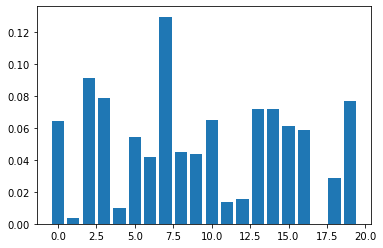

In [24]:
import matplotlib.pyplot as plt

# feature selection
X_train_fs, X_test_fs, fs_c = select_features(X_train, pd.DataFrame(Y_train), X_validate)
# what are scores for the features
for i in range(len(fs_c.scores_)):
    print('Feature %d: %f' % (i, fs_c.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs_c.scores_))], fs_c.scores_)
plt.show()

In [ ]:
# Find the index value of the feature
features_c = [i for i in range(len(fs_c.scores_)) if fs_c.scores_[i]>0.06]

In [ ]:
# Remove the unnecesary feature
features_c.remove(2)

In [ ]:
# Check what the selected features are
data_train.columns[features_c]

### Training models

I do not run this part as it takes time on my computer to run the models I only train the final model and make the predictions

First I run a logistic regression and measure the performance with AC and MCC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

model = LogisticRegression(solver='lbfgs')
model.fit(X_train.iloc[:,features_c], Y_train)
# evaluate the model
yhat = model.predict(X_validate.iloc[:,features_c])
# evaluate predictions
accuracy = accuracy_score(Y_validate, yhat)
mcc = matthews_corrcoef(Y_validate, yhat)
print('Accuracy: %.2f' % (accuracy*100))
print('MCC: %.2f' % (mcc))

Now we run the Random Forest with the preselected features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(random_state=123)
# fit the model
model.fit(X_train.iloc[:,features_c], Y_train)
# evaluate the model
yhat = model.predict(X_validate.iloc[:,features_c])
# evaluate predictions
accuracy = accuracy_score(Y_validate, yhat)
mcc = matthews_corrcoef(Y_validate, yhat)
print('Accuracy: %.2f' % (accuracy*100))
print('MCC: %.2f' % (mcc))

I run the random forest model with all the features

In [ ]:
# define the model
model = RandomForestClassifier(random_state=123)
# fit the model
model.fit(X_train.iloc[:,all_f], Y_train)
# evaluate the model
yhat = model.predict(X_validate.iloc[:,all_f])
# evaluate predictions
accuracy = accuracy_score(Y_validate, yhat)
mcc = matthews_corrcoef(Y_validate, yhat)
print('Accuracy: %.2f' % (accuracy*100))
print('MCC: %.2f' % (mcc))

In this section I look  at the most important variables for the RF algorithm

In [ ]:
importances = model.feature_importances_

In [ ]:
features_rf = [i for i in range(len(importances)) if importances[i]>0.04]

In [ ]:
importances

In [ ]:
data_train.columns[all_f][features_rf]

I now run the logistic regression with all the variables - not a good idea... only for demonstration purposes

In [ ]:
# define the model
model = LogisticRegression(solver='lbfgs')
# fit the model
model.fit(X_train.iloc[:,all_f], Y_train)
# evaluate the model
yhat = model.predict(X_validate.iloc[:,all_f])
# evaluate predictions
accuracy = accuracy_score(Y_validate, yhat)
mcc = matthews_corrcoef(Y_validate, yhat)
print('Accuracy: %.2f' % (accuracy*100))
print('MCC: %.2f' % (mcc))

I now run the final Model

In [26]:
# the difference in indexing is due to the concatenation of the datasets, the values are the same
all_f = [0,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19]
all_f1 = [0,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19]
# all_f = all_f.remove('date')
all_f

[0, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [27]:
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(random_state=123)
# fit the model
model.fit(X_train.iloc[:,all_f], Y_train)
# evaluate the model
yhat = model.predict(data_test.iloc[:,all_f1])

<ipython-input-27-15cdf762e40a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train.iloc[:,all_f], Y_train)


In [31]:
yhat.sum()

17924

In [ ]:
# add new column to the training set
data_test['revenue_generators'] = yhat

In [ ]:
# dataset of revenue generators
reven_gen = list(data_test[data_test['revenue_generators'] == 1]['fullVisitorId'].unique())

In [ ]:
# export the predicted revenue generators
import csv
# open the file in the write mode
f = open('./pred_revenue_generators.txt', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
for visitor in reven_gen:
        writer.writerow([visitor])
# writer.writerows(revenue_generators)

# close the file
f.close()

## Data Insights

Ran only on the predicted users. Should have done it on the full dataset.

In [ ]:
data_test['date'] =  pd.to_datetime(data_test['date'],
                              format='%Y%m%d')

In [ ]:
data_test['day'] = data_test['date'].dt.strftime('%a')

In [ ]:
data_test[data_test['revenue_generators']==1]['day'].value_counts()

In [ ]:
data_train.columns

In [ ]:
data_test[data_test['revenue_generators']==1]['trafficSource_adwordsClickInfo.isVideoAd'].value_counts()

In [ ]:
data_test[data_test['revenue_generators']==1]['trafficSource_adwordsClickInfo.page'].value_counts()

In [ ]:
data_test[data_test['revenue_generators']==1]['trafficSource_isTrueDirect'].value_counts()

In [ ]:
data_test[data_test['revenue_generators']==1]['trafficSource_source'].value_counts()

In [ ]:
data_test[data_test['revenue_generators']==1]['channelGrouping'].value_counts()

In [ ]:
data_test['channelGrouping'] = data_test1['channelGrouping']